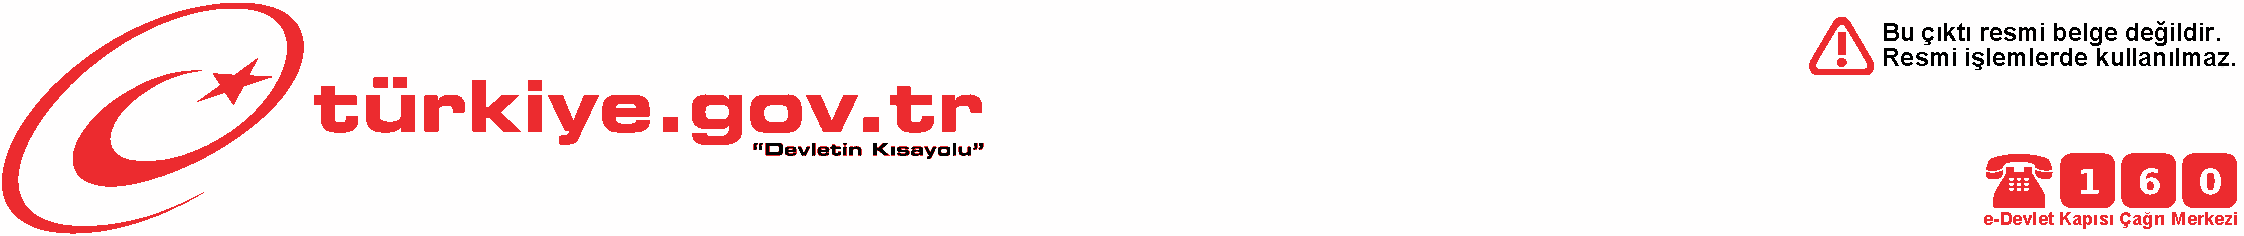

In [8]:
from IPython.display import Image
import os

Image("C:/Users/pc/Desktop/udemy/python/e-devlet/printhead.png")

**Recommender Systems — User-Based and Item-Based Collaborative Filtering**<br><br>

**User Based Collaborative Filtering**<br>

Collaborative filtering is making recommend according to combination of your experience and experiences of other people.<br>
* First we need to make **user** vs **item** matrix.<br>
* Each **row is users** and each **columns are items** like movie, product or websites<br>
* Secondly, computes **similarity scores between users**.<br>
* Each row is users and each row is vector.<br>
* Compute similarity of these rows (users).<br>
* Thirdly, **find users who are similar to you based on past behaviours**<br>
* Finally, it **suggests that you are not experienced before.**<br>

**PROS:** <br>
* Easy to implement.<br>
* Context independent.<br>
* Compared to other techniques, such as content-based, it is more accurate.<br>

**CONS:** <br>
* **Sparsity**: The percentage of people who rate items is really low.<br>
* **Scalability**: The more K neighbors we consider (under a certain threshold), the better my classification should be. Nevertheless, the more users there are in the system, the greater the cost of finding the nearest K neighbors will be.<br>
* **Cold-start**: New users will have no to little information about them to be compared with other users.<br>
* **New item**: Just like the last point, new items will lack of ratings to create a solid ranking (More of this on ‘How to sort and rank items’).<br>

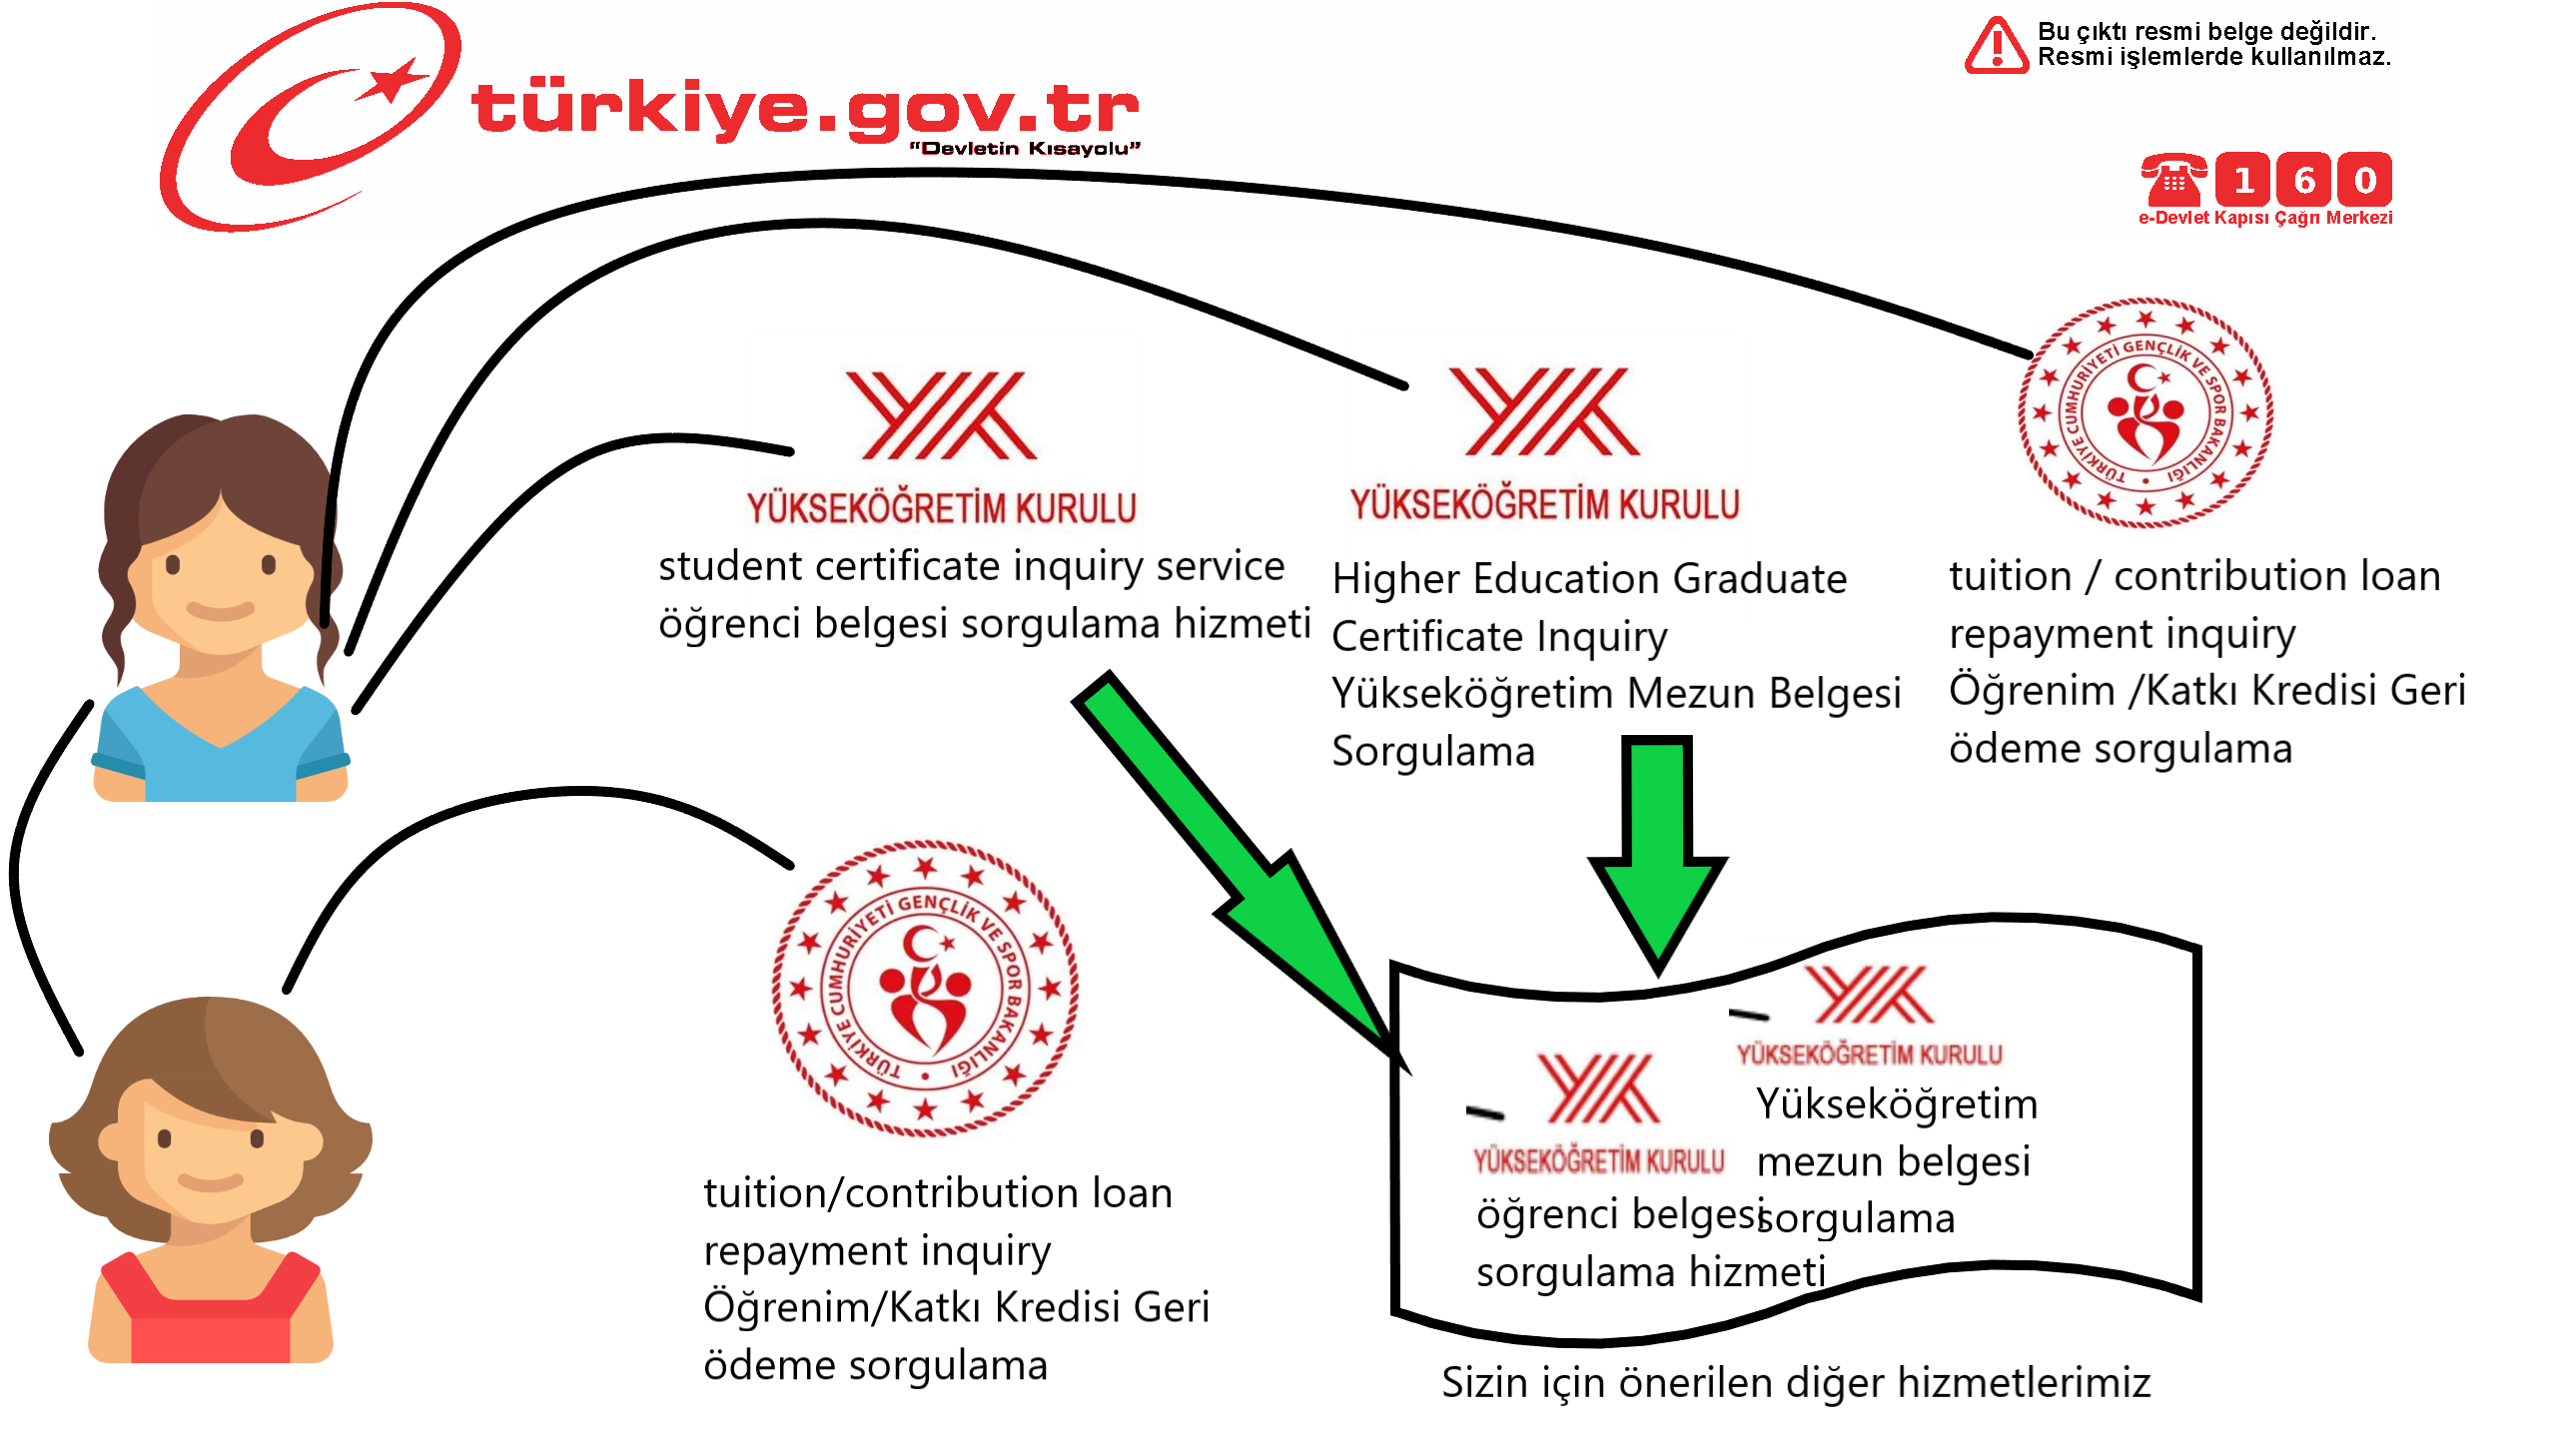

In [9]:
from IPython.display import Image
import os

Image("C:/Users/pc/Desktop/udemy/python/e-devlet/user-based.png")

**Item-Based Collaborative Filtering (IB-CF)**<br>

Instead of focusing on users, we could focus on wchich services from all the options are more similar to what we know he enjoys. This new focus is known as Item-Based Collaborative Filtering (IB-CF).
We could divide IB-CF in two sub tasks:<br>

1. Calculate similarity among the items:<br>
  * Cosine-Based Similarity <br>
  * Correlation-Based Similarity <br>
  * Adjusted Cosine Similarity <br>
  * Jaccard distance <br>
2. Calculation of Prediction: <br>
  * Weighted Sum<br>
  * Regression<br>

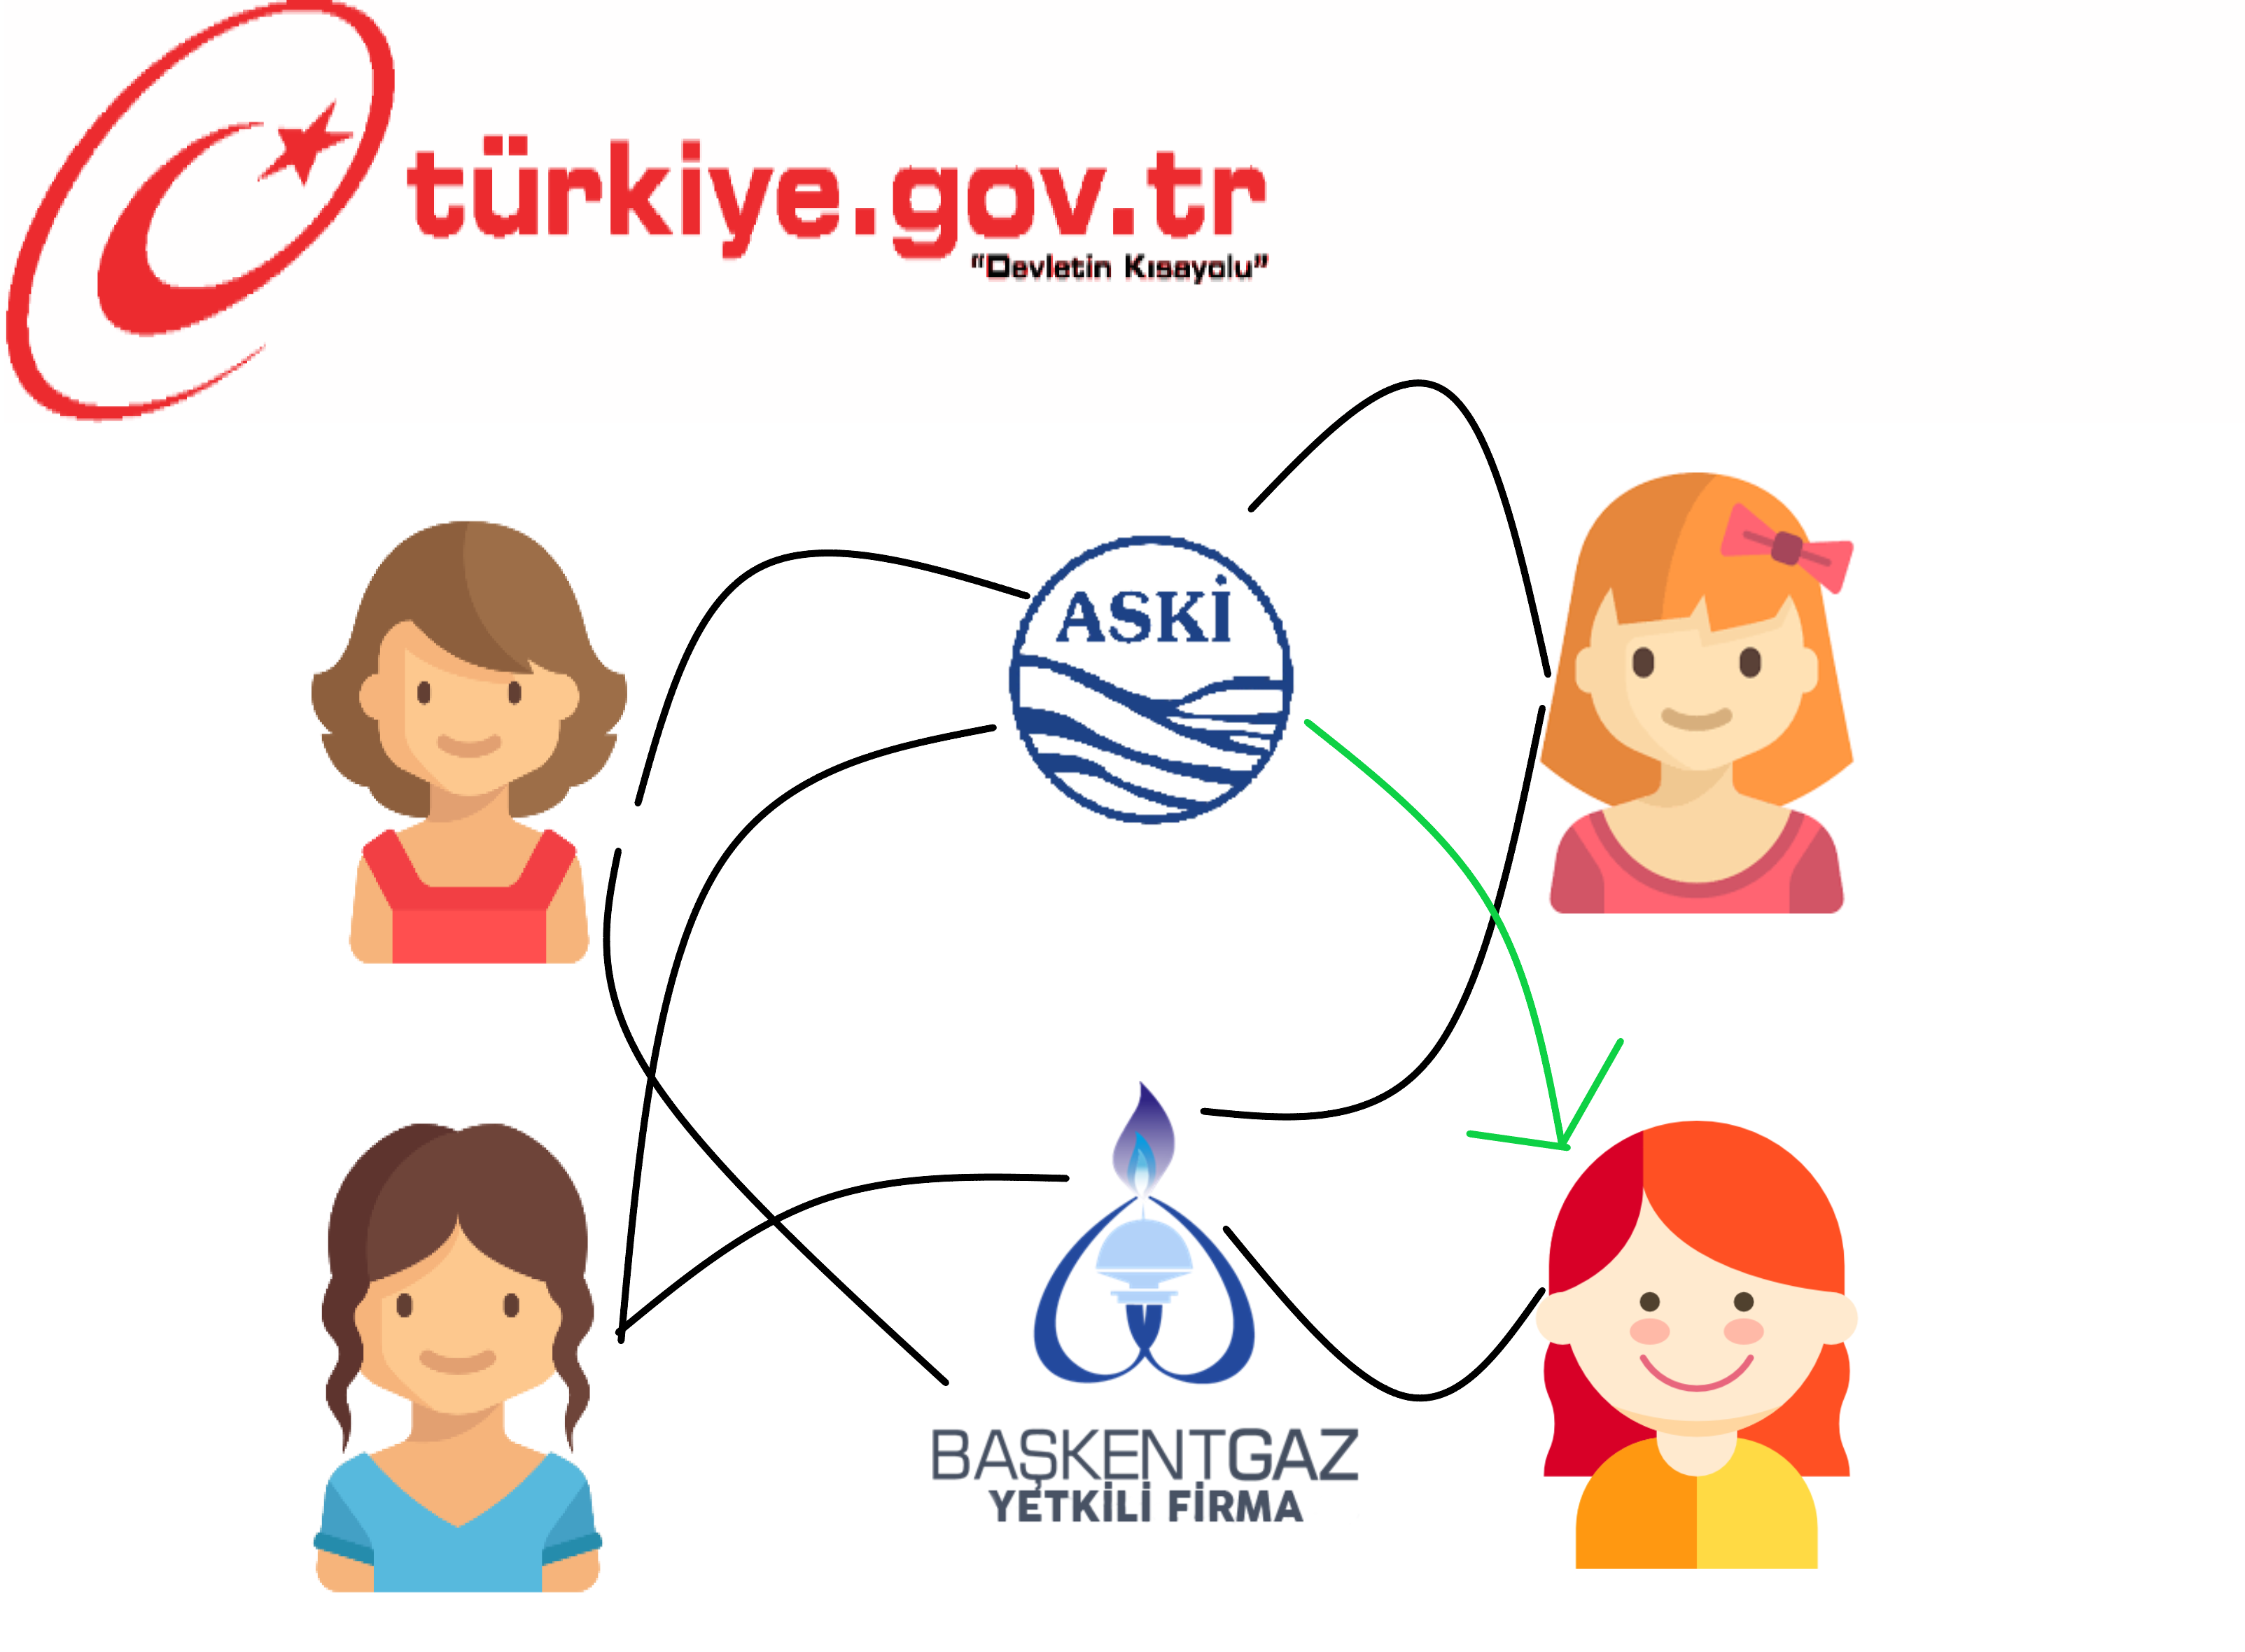

In [10]:
from IPython.display import Image
import os

Image("C:/Users/pc/Desktop/udemy/python/e-devlet/item-based.png")

In [11]:
import numpy as np
import pandas as pd

In [12]:
dataFrame=pd.read_csv('e-devlet_eda.csv')

In [13]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
UserId                      67 non-null int64
Service Id                  67 non-null int64
Category                    67 non-null object
Service Provider Type       67 non-null object
Service Provider Subject    67 non-null object
Service Provider Name       67 non-null object
Service                     67 non-null object
Rate                        67 non-null float64
Number Of Order             67 non-null int64
Unnamed: 9                  0 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.3+ KB


In [14]:
dataFrame.head()

,UserId,Service Id,Category,Service Provider Type,Service Provider Subject,Service Provider Name,Service,Rate,Number Of Order,Unnamed: 9
0,115765,1,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,3.5,5,NaN
1,127896,2,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,4.5,4,NaN
2,135764,3,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,2.5,3,NaN
3,235769,4,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,1.5,2,NaN
4,925765,5,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,3.2,1,NaN


In [15]:
dataFrame.drop(['Unnamed: 9'],axis=1,inplace=True)
dataFrame.head()


,UserId,Service Id,Category,Service Provider Type,Service Provider Subject,Service Provider Name,Service,Rate,Number Of Order
0,115765,1,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,3.5,5
1,127896,2,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,4.5,4
2,135764,3,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,2.5,3
3,235769,4,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,1.5,2
4,925765,5,e-services,Public Institution,Justice,Justice Ministry,Criminal Record Inquiry,3.2,1


In [103]:
service_list=list(dataFrame['Service'].unique())

provider_list=list( dataFrame['Service Provider Name'].unique())

for i in range(0,len(service_list),1):
    print(service_list[ i ],'\n')

Criminal Record Inquiry 

Criminal Record Verifying 

Interview Application For Judges and Prosecutors 

Case File Inquiry 

Job Application 

Individual Subscription Application 

Debt Inquiry 

Receipt Information Inquiry 

Subscriber Info Inquiry 

natural gas subscription inquiry 



In [53]:
d1=dataFrame.loc[:10,['UserId','Service Id','Rate','Number Of Order']]
d1.head()

,UserId,Service Id,Rate,Number Of Order
0,115765,1,3.5,5
1,127896,2,4.5,4
2,135764,3,2.5,3
3,235769,4,1.5,2
4,925765,5,3.2,1


In [74]:
d2=dataFrame.loc[22:28,['Service Id','Service Provider Name','Service']]
d2.head()



,Service Id,Service Provider Name,Service
22,23,Justice Ministry,Case File Inquiry
23,24,Justice Ministry,Case File Inquiry
24,25,Supreme Court,Job Application
25,26,Supreme Court,Job Application
26,27,Supreme Court,Job Application


In [18]:
df=dataFrame[['UserId','Service Id','Rate','Service Provider Name','Service']]
df.head()

,UserId,Service Id,Rate,Service Provider Name,Service
0,115765,1,3.5,Justice Ministry,Criminal Record Inquiry
1,127896,2,4.5,Justice Ministry,Criminal Record Inquiry
2,135764,3,2.5,Justice Ministry,Criminal Record Inquiry
3,235769,4,1.5,Justice Ministry,Criminal Record Inquiry
4,925765,5,3.2,Justice Ministry,Criminal Record Inquiry


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


In [20]:
df.groupby('Service')['Rate'].mean().sort_values(ascending=False).head()

Service
Interview Application For Judges and Prosecutors    4.100000
Case File Inquiry                                   4.014286
Individual Subscription Application                 3.525000
Subscriber Info Inquiry                             3.212500
Receipt Information Inquiry                         3.212500
Name: Rate, dtype: float64

In [21]:
df.groupby('Service')['Rate'].count().sort_values(ascending=False).head()

Service
Job Application                                     9
Subscriber Info Inquiry                             8
Receipt Information Inquiry                         8
Interview Application For Judges and Prosecutors    8
Individual Subscription Application                 8
Name: Rate, dtype: int64

In [22]:
ratings = pd.DataFrame(df.groupby('Service')['Rate'].mean())
ratings.head()

,Rate
Service,
Case File Inquiry,4.014286
Criminal Record Inquiry,3.040000
Criminal Record Verifying,2.850000
Debt Inquiry,2.957143
Individual Subscription Application,3.525000


In [23]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Service')['Rate'].count())
ratings.head()

,Rate,num of ratings
Service,,
Case File Inquiry,4.014286,7
Criminal Record Inquiry,3.040000,5
Criminal Record Verifying,2.850000,4
Debt Inquiry,2.957143,7
Individual Subscription Application,3.525000,8


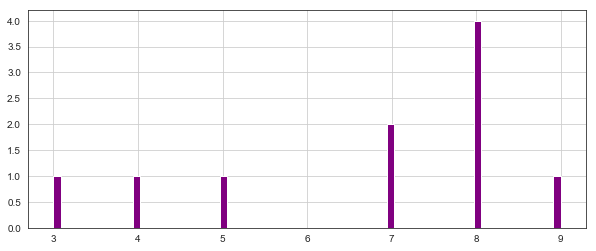

In [24]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70,color='purple')

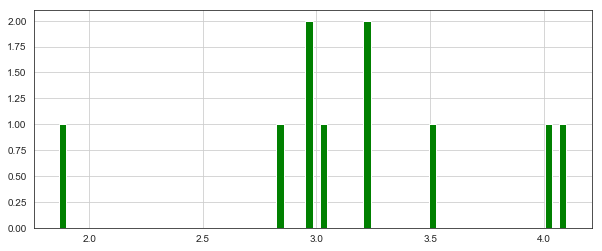

In [25]:
plt.figure(figsize=(10,4))
ratings['Rate'].hist(bins=70,color='green')

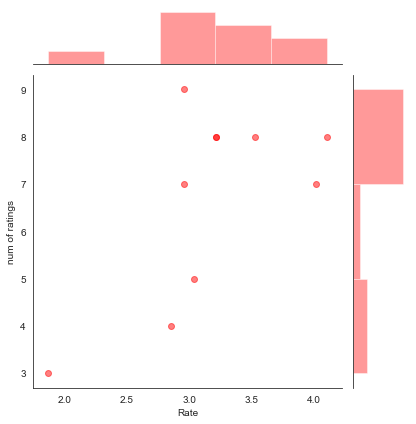

In [26]:
sns.jointplot(x='Rate',y='num of ratings',data=ratings,alpha=0.5,color='red')

In [28]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rate,num of ratings
Service,,
Job Application,2.955556,9
Individual Subscription Application,3.525000,8
Interview Application For Judges and Prosecutors,4.100000,8
Receipt Information Inquiry,3.212500,8
Subscriber Info Inquiry,3.212500,8
Case File Inquiry,4.014286,7
Debt Inquiry,2.957143,7
Criminal Record Inquiry,3.040000,5
Criminal Record Verifying,2.850000,4


In [29]:
##Let's choose two services:Receipt_Information_Inquiry, Individual_Subscription_Application.
ratings.head()

,Rate,num of ratings
Service,,
Case File Inquiry,4.014286,7
Criminal Record Inquiry,3.040000,5
Criminal Record Verifying,2.850000,4
Debt Inquiry,2.957143,7
Individual Subscription Application,3.525000,8


Now let's create a matrix that has the user ids on one access and the service name on another axis. Each cell will then consist of the rating the user gave to that service. **Note there will be a lot of NaN values, because most people have not seen most of the movies.**

In [27]:
moviemat = df.pivot_table(index='UserId',columns='Service',values='Rate')
moviemat.head()

Service,Case File Inquiry,Criminal Record Inquiry,Criminal Record Verifying,Debt Inquiry,Individual Subscription Application,Interview Application For Judges and Prosecutors,Job Application,Receipt Information Inquiry,Subscriber Info Inquiry,natural gas subscription inquiry
UserId,,,,,,,,,,
105555,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN
115765,NaN,3.5,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN
119965,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,5.7,NaN
123574,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [30]:

#Now let's grab the user ratings for those two movies:
Receipt_Information_Inquiry=moviemat['Receipt Information Inquiry']

Individual_Subscription_Application=moviemat['Individual Subscription Application']

Individual_Subscription_Application.head()

UserId
105555    4.6
115765    NaN
119965    NaN
122555    NaN
123574    3.0
Name: Individual Subscription Application, dtype: float64

In [35]:
#We can then use corrwith() method to get correlations between two pandas series:
similar_to_Receipt_Information_Inquiry=moviemat.corrwith(Receipt_Information_Inquiry)
similar_to_Individual_Subscription_Application=moviemat.corrwith(Individual_Subscription_Application)


C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\pc\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
#Let's clean this by removing NaN values and using a DataFrame instead of a series:
corr_Individual_Subscription_Application = pd.DataFrame(similar_to_Individual_Subscription_Application,columns=['Correlation'])
corr_Individual_Subscription_Application.dropna(inplace=True)
corr_Individual_Subscription_Application .head()


,Correlation
Service,
Criminal Record Inquiry,-1.000000
Criminal Record Verifying,-1.000000
Debt Inquiry,0.617415
Individual Subscription Application,1.000000
Interview Application For Judges and Prosecutors,0.491100


In [105]:
#Now if we sort the dataframe by correlation, we should get the most similar services,
#however note that we get some results that don't really make sense.
#This is because there are a lot of services only used once by users who also
#used Individual_Subscription_Application(it was the most popular movie).
corr_Individual_Subscription_Application.sort_values('Correlation',ascending=False).head(2)


,Correlation
Service,
Individual Subscription Application,1.000000
Debt Inquiry,0.617415


So,if one user chooses to use **Individual_Subscription_Application(Bireysel Abonelik Başvurusu)** ,our simple Artificial Intelligence suggest user to use  **Debt Inquiry** . 